## Crow Search Algorithm

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import pandas as pd  
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score 
from sklearn.utils import resample  
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from math import * 
import math 
import random 
import os 
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('heart project.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
print("Dimension Heart est : ==> ",df.shape)

Dimension Heart est : ==>  (1025, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

In [8]:
df.iloc[7]

age          55.0
sex           1.0
cp            0.0
trestbps    160.0
chol        289.0
fbs           0.0
restecg       0.0
thalach     145.0
exang         1.0
oldpeak       0.8
slope         1.0
ca            1.0
thal          3.0
target        0.0
Name: 7, dtype: float64

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.105479 -0.092148  0.280189  0.203253  0.110958   
sex      -0.105479  1.000000 -0.053450 -0.071923 -0.152997  0.027200   
cp       -0.092148 -0.053450  1.000000  0.025526 -0.092239  0.073738   
trestbps  0.280189 -0.071923  0.025526  1.000000  0.127010  0.152272   
chol      0.203253 -0.152997 -0.092239  0.127010  1.000000  0.034139   
fbs       0.110958  0.027200  0.073738  0.152272  0.034139  1.000000   
restecg  -0.149732 -0.044169  0.066715 -0.137273 -0.163354 -0.101709   
thalach  -0.382724 -0.047053  0.336116 -0.028880 -0.054794 -0.016292   
exang     0.077594  0.139157 -0.427933  0.043791  0.088895  0.049261   
oldpeak   0.264500  0.090896 -0.195285  0.146722  0.057102  0.032542   
slope    -0.180627 -0.020843  0.169307 -0.081828 -0.026660 -0.048340   
ca        0.339808  0.113834 -0.217002  0.091323  0.114584  0.138197   
thal      0.088586  0.241115 -0.212186  0.058995  0.084941 -0.01

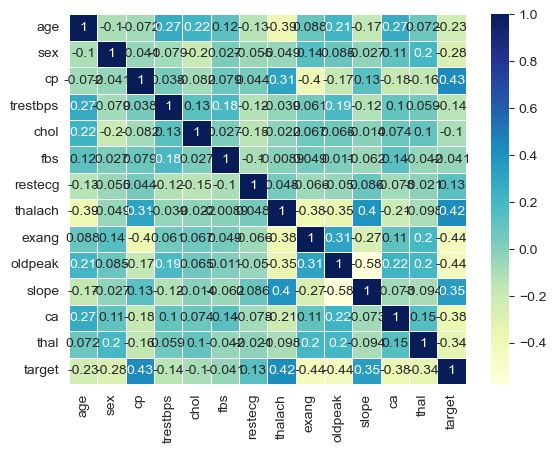

In [9]:
correlation = df.corr(method='pearson')
sns.heatmap(correlation, 
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            cmap="YlGnBu",
            annot=True,
            linewidth=0.5)
spearman_correlation=df.corr(method='spearman')
print(spearman_correlation)
kendall_correlation=df.corr(method='kendall')
print(kendall_correlation)

In [10]:
scale = StandardScaler()

In [11]:

x = df.drop(['target'], axis=1)
y = df['target'].astype(float)
x=scale.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

## KNN

In [12]:

classifier= KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

#Fit the model for the data

classifier.fit(x_train, y_train)

#Make the prediction
y_pred = classifier.predict(x_test)
accuracy_KNN_without = accuracy_score(y_test,y_pred)*100

In [13]:
accuracy_KNN_without

87.8048780487805

In [14]:
#CSA
def fitness(variables_values = []):
    classifier= KNeighborsClassifier(n_neighbors=math.ceil(variables_values[0]), p=math.ceil(variables_values[1]), metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    return accuracy
def initial_population(population_size = 30, min_values = [5,1], max_values = [120,3], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [5,1], max_values = [120,3], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 30, ap = 0.02, fL = 2, min_values = [5,1], max_values = [120,3], iterations = 50, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [15]:
resultat_KNN=crow_search_algorithm()
resultat_KNN

(array([ 8.74064652,  1.        , 92.68292683]),
 [array([120.        ,   2.22951075,  84.3902439 ]),
  array([39.32034978,  2.48942359, 86.34146341]),
  array([89.25592989,  1.37905819, 83.90243902]),
  array([101.76759049,   2.83864882,  84.3902439 ]),
  array([98.20834952,  1.39428955, 82.92682927]),
  array([39.39215198,  2.52587706, 86.34146341]),
  array([57.07243425,  2.79827331, 83.90243902]),
  array([120.        ,   1.75516736,  82.43902439]),
  array([114.58120558,   1.84250366,  83.41463415]),
  array([69.80096051,  1.10936187, 83.41463415]),
  array([109.70263889,   2.97584267,  84.3902439 ]),
  array([61.62795461,  2.81008998, 85.36585366]),
  array([82.69128781,  2.65974544, 85.36585366]),
  array([102.55768226,   1.        ,  83.90243902]),
  array([114.1029706 ,   1.17915594,  83.41463415]),
  array([56.96139708,  2.64791322, 84.87804878]),
  array([120.        ,   2.33165068,  84.3902439 ]),
  array([38.50429588,  1.98209906, 85.85365854]),
  array([102.98310478,   1.

In [16]:
resultat_KNN[0]#best position

array([ 8.74064652,  1.        , 92.68292683])

In [17]:
accuracy_KNN_withCSA=resultat_KNN[0][2]
accuracy_KNN_withCSA

92.6829268292683

In [18]:
ds=pd.DataFrame(data=resultat_KNN[1])
ds=ds.sort_values(by=[0,1])
ds=ds.drop_duplicates()
fig = px.scatter_3d(ds, x = 0, y = 1, z = 2)
fig.show()

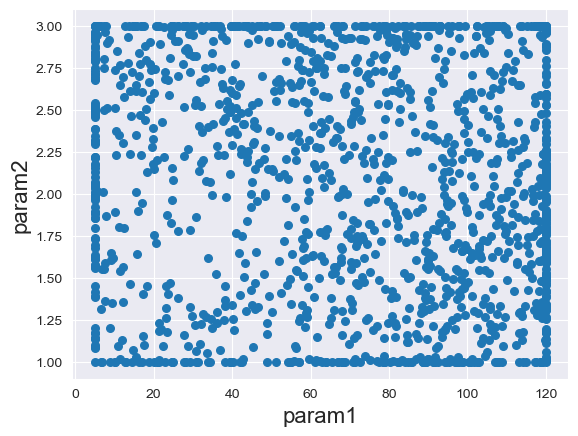

In [19]:
plt.scatter(ds[0], ds[1],s=30)
plt.xlabel('param1', fontsize=16)
plt.ylabel('param2', fontsize=16)
plt.show()

## RandomForest

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=10,n_estimators =5)
classifier.fit(x_train, y_train)
y_pred_RF_sans = classifier.predict(x_test)
accuracy_RF_without = accuracy_score(y_test,y_pred_RF_sans)*100
print("accuracy=",accuracy_RF_without)
print("recall=",recall_score(y_test,y_pred))


accuracy= 99.02439024390245
recall= 0.897196261682243


In [21]:
#csa
def fitness(variables_values = [3,8]):
    classifier = RandomForestClassifier(max_depth=math.ceil(variables_values[0]),n_estimators =math.ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred_RF_avec= classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred_RF_avec)*100
    return accuracy
def initial_population(population_size = 5, min_values = [2,2], max_values = [100,10], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [2,2], max_values = [100,10], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 30, ap = 0.02, fL = 2, min_values = [2,2], max_values = [100,10], iterations = 80, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [22]:
resultat_RF=crow_search_algorithm()
resultat_RF

(array([ 63.46156239,   7.        , 100.        ]),
 [array([ 63.46156239,   7.        , 100.        ]),
  array([ 41.17599845,   5.73435033, 100.        ]),
  array([ 42.82532908,   7.41971905, 100.        ]),
  array([66.51428537,  3.48179192, 98.04878049]),
  array([ 2.        ,  3.92987248, 86.82926829]),
  array([ 63.9914792 ,   5.87320773, 100.        ]),
  array([ 70.58869904,   6.11672191, 100.        ]),
  array([ 86.15606739,   4.14990971, 100.        ]),
  array([ 21.97617316,   7.28921314, 100.        ]),
  array([ 54.04920152,   3.90207024, 100.        ]),
  array([100.        ,   6.88565867, 100.        ]),
  array([ 6.77415159,  6.16383037, 98.53658537]),
  array([ 69.43665778,  10.        , 100.        ]),
  array([ 90.07525578,   4.70199357, 100.        ]),
  array([ 42.04520867,   7.27220816, 100.        ]),
  array([ 69.19727353,   8.76829578, 100.        ]),
  array([63.26547594,  5.45123836, 98.04878049]),
  array([ 65.45059322,   6.9789688 , 100.        ]),
  arra

In [23]:
#best position
resultat_RF[0]

array([ 63.46156239,   7.        , 100.        ])

In [24]:
accuracy_RF_withCSA=resultat_RF[0][2]
accuracy_RF_withCSA

100.0

In [26]:
ds=pd.DataFrame(data=resultat_RF[1])
ds=ds.sort_values(by=[0,1])
ds=ds.drop_duplicates()

  
fig = px.scatter_3d(ds, x = 0, 
                    y = 1, z = 2)
  
fig.show()

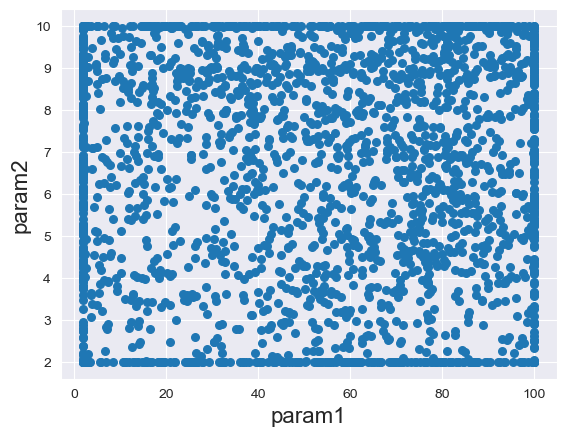

In [27]:
plt.scatter(ds[0], ds[1],s=30)
plt.xlabel('param1', fontsize=16)
plt.ylabel('param2', fontsize=16)
plt.show()

## Logistic Regression

In [25]:
x = df.drop(['target'], axis=1)
y = df['target'].astype(float)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [26]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
accuracy_RL_without = accuracy_score(y_test,y_pred)*100
accuracy_RL_without

86.34146341463415

In [27]:
#CSA
def fitness(variables_values = [1.0,0]):
    classifier = LogisticRegression(C=variables_values[0],random_state=ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    return accuracy
def initial_population(population_size = 5, min_values = [0.1,0], max_values = [1000.0,100], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [0.1,0], max_values = [1000.0,100], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 30, ap = 0.7, fL =5, min_values = [0.1,0], max_values = [1000.0,100], iterations = 20, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [28]:
resultat_RL=crow_search_algorithm()
resultat_RL

(array([594.74022152,  12.        ,  86.82926829]),
 [array([862.52599438,  70.36423179,  85.36585366]),
  array([ 0.1       ,  0.        , 86.34146341]),
  array([779.35820915,  12.94667533,  85.36585366]),
  array([226.08225574,  26.26479122,  85.85365854]),
  array([ 0.1       , 75.51675544, 86.34146341]),
  array([134.66427133,  55.28920219,  86.34146341]),
  array([642.08153753,  61.86889081,  85.85365854]),
  array([594.74022152,  12.        ,  86.82926829]),
  array([867.6756582 ,  55.60717748,  86.82926829]),
  array([241.21713191,  93.24482596,  85.36585366]),
  array([262.11176109,   0.        ,  85.36585366]),
  array([468.66081046,  17.1084086 ,  86.34146341]),
  array([49.82235997, 70.41747706, 85.85365854]),
  array([22.71300928, 45.69756059, 85.36585366]),
  array([141.16015289,  32.98265973,  86.34146341]),
  array([982.63238558,  14.76112343,  86.82926829]),
  array([1000.        ,  100.        ,   86.34146341]),
  array([816.77175592,  15.73370059,  86.82926829]),
  a

In [29]:
resultat_RL[0]

array([594.74022152,  12.        ,  86.82926829])

In [30]:
accuracy_RL_withCSA=resultat_RL[0][2]
accuracy_RL_withCSA

86.82926829268293

In [35]:
ds=pd.DataFrame(data=resultat_RL[1])
ds=ds.sort_values(by=[0,1])
ds=ds.drop_duplicates()
fig = px.scatter_3d(ds, x = 0,y = 1, z = 2)
fig.show()

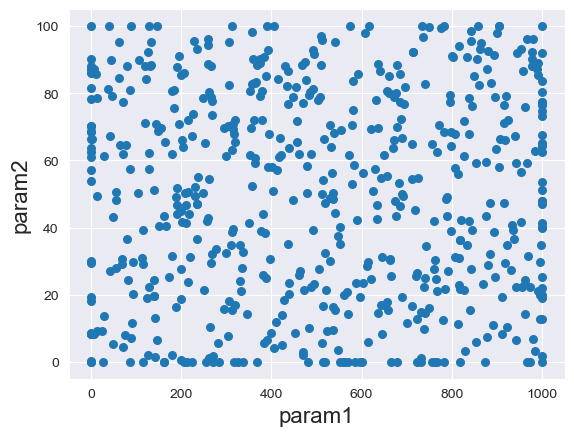

In [36]:
plt.scatter(ds[0], ds[1],s=30)
plt.xlabel('param1', fontsize=16)
plt.ylabel('param2', fontsize=16)
plt.show()

## Evaluation 

In [31]:
y1 = [accuracy_KNN_without, accuracy_RF_without, accuracy_RL_without] 
y2 = [accuracy_KNN_withCSA, accuracy_RF_withCSA, accuracy_RL_withCSA]

<AxesSubplot:xlabel='0', ylabel='1'>

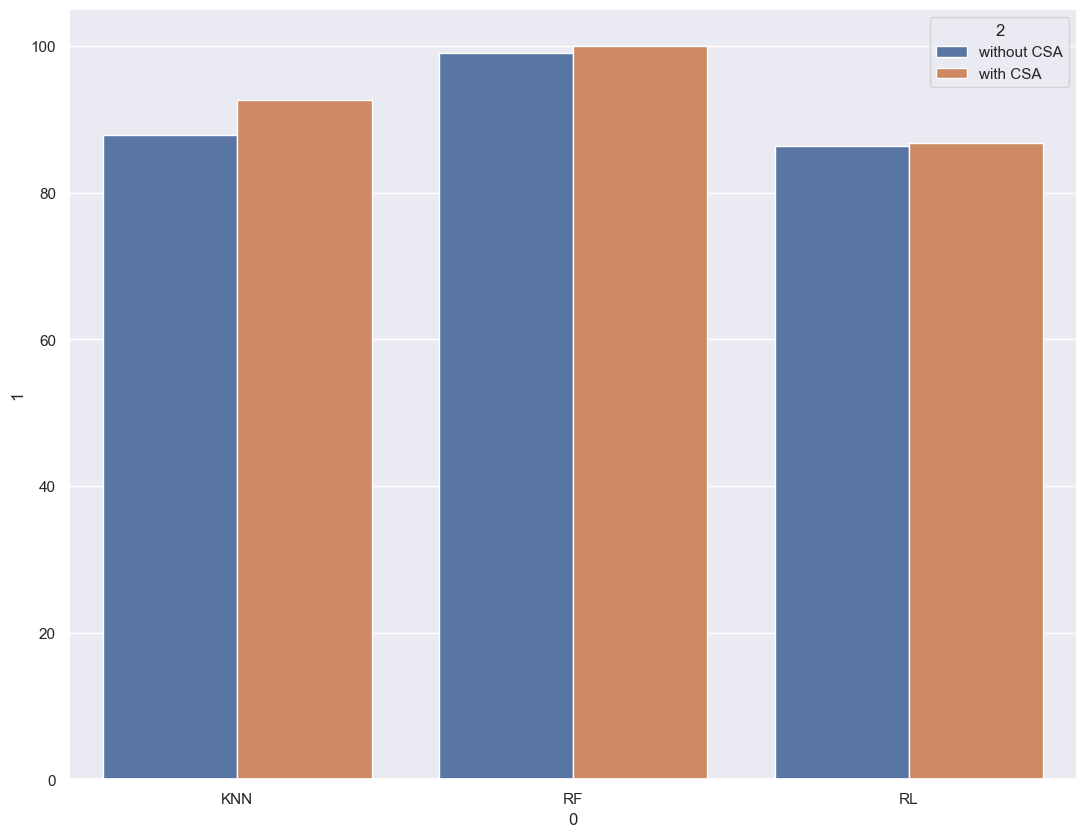

In [32]:
ds=[['KNN',y1[0],'without CSA'],['KNN',y2[0],'with CSA'],['RF',y1[1],'without CSA'],['RF',y2[1],'with CSA'],['RL',y1[2],'without CSA'],['RL',y2[2],'with CSA']]
ds=pd.DataFrame(ds)
sns.set(rc={'figure.figsize':(13,10)})
sns.barplot(data=ds, x=0, y=1, hue=2)